In [1]:
import os
os.chdir("/content/drive/MyDrive/Zindi Competitions/Umojahack2022Advanced")

In [2]:
import random

import numpy as np 
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch import nn 
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

import collections
from itertools import combinations, product

from sklearn.linear_model import Ridge

In [7]:
import sklearn, itertools
for x in [np, pd, torch, sklearn]:
  print(x.__name__, "------------------>", x.__version__)

numpy ------------------> 1.21.5
pandas ------------------> 1.3.5
torch ------------------> 1.10.0+cu111
sklearn ------------------> 1.0.2


In [ ]:
torch.manual_seed(125)
random.seed(15546)
np.random.seed(166)

In [ ]:
!ls Submissions/

cb2.csv		       sample_submission_lb_ug.csv
cb3-lessFeatures.csv   sample_submission_lb_ug_more_features-15epochs1e3lr.csv
cb.csv		       sample_submission_lb_ug_more_features-25epochs.csv
rf.csv		       sample_submission_lb_ug_more_features_bs_32.csv
sample_submission.csv  sample_submission_lb_ug_more_features.csv


In [ ]:
os.listdir("Submissions")

['sample_submission.csv',
 'sample_submission_lb_ug.csv',
 'rf.csv',
 'cb.csv',
 'cb3-lessFeatures.csv',
 'sample_submission_lb_ug_more_features_bs_32.csv',
 'sample_submission_lb_ug_more_features.csv',
 'sample_submission_lb_ug_more_features-25epochs.csv',
 'sample_submission_lb_ug_more_features-15epochs1e3lr.csv',
 'cb2.csv',
 'sample_submission_lb_ug_more_features+stats.csv',
 'blend0.csv',
 'blend1.csv']

In [ ]:
subs_to_blend = ['sample_submission.csv',
 'sample_submission_lb_ug.csv',
 'rf.csv',
 'cb.csv',
 'cb3-lessFeatures.csv',
 'sample_submission_lb_ug_more_features_bs_32.csv',
 'sample_submission_lb_ug_more_features.csv',
 'cb2.csv',
 'sample_submission_lb_ug_more_features+stats.csv']

In [ ]:
def create_df_stack():
  df1 = pd.read_csv(f"Submissions/{subs_to_blend[0]}")
  for i, f in enumerate(subs_to_blend[1:]):
    df1 = pd.concat([df1, pd.read_csv(f"Submissions/{f}", usecols=[1], names=[f"Signal_{i}"], skiprows=1)], axis=1)

  return df1

In [ ]:
df = create_df_stack()

In [ ]:
df

,ID,Signal,Signal_0,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9
0,P19003_Bioclone_1,-0.996608,-0.795908,-0.800165,-0.622076,-0.702664,-0.831535,-0.712062,-0.712062,-0.765221,-0.788217,-0.864637
1,P19003_Bioclone_2,-0.788735,-0.753853,-0.554088,-0.532648,-0.527374,-0.642671,-0.954730,-0.954730,-0.549223,-0.527149,-0.570135
2,P19003_Bioclone_3,-0.694263,-0.736840,-0.584062,-0.442964,-0.497492,-0.731263,-0.593987,-0.593987,-0.809398,-0.573859,-0.699077
3,P19003_Bioclone_4,0.892162,1.754054,0.064497,-0.075840,0.238933,0.844382,1.516414,1.516414,1.334674,0.140898,1.704229
4,P19003_Bioclone_5,0.250877,0.689860,-0.066947,-0.089376,0.102131,0.316749,0.726446,0.726446,0.055389,0.019893,0.621016
...,...,...,...,...,...,...,...,...,...,...,...,...
36535,P01405_VINS_Central_Africa_41,0.313477,-0.014012,0.783056,0.987740,0.600743,0.588072,0.729307,0.729307,0.202534,0.600351,0.921198
36536,P01405_VINS_Central_Africa_42,-0.263989,-0.374149,1.083023,1.182723,0.793893,-0.048649,0.519925,0.519925,-0.029487,0.945880,0.407565
36537,P01405_VINS_Central_Africa_43,0.023290,0.120011,0.764054,0.969612,0.611605,0.035532,1.134035,1.134035,0.025870,0.663024,1.121452
36538,P01405_VINS_Central_Africa_44,0.442593,0.603991,1.019254,1.149169,0.853272,0.175664,1.272856,1.272856,0.388792,0.954372,0.949362


In [ ]:
model = Ridge(random_state=1123)

In [ ]:
model.fit(df[df.columns[2:]], df["Signal"])

Ridge(random_state=1123)

In [ ]:
pred=model.predict(df[df.columns[2:]])

In [ ]:
sample_submission=df[["ID"]]
sample_submission["Signal"] = pred.reshape((-1))
sample_submission.to_csv("Submissions/blend0.csv",index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sample_submission.head()

,ID,Signal
0,P19003_Bioclone_1,-0.789976
1,P19003_Bioclone_2,-0.679809
2,P19003_Bioclone_3,-0.700837
3,P19003_Bioclone_4,1.460138
4,P19003_Bioclone_5,0.542692


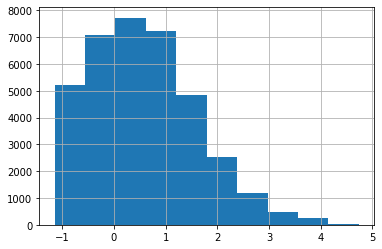

In [ ]:
sample_submission["Signal"].hist()

## Blend 2

In [ ]:
df = create_df_stack()

In [ ]:
model = Ridge(random_state=1123, alpha=3)

In [ ]:
model.fit(df[df.columns[2:]], df["Signal"])

Ridge(alpha=3, random_state=1123)

In [ ]:
pred=model.predict(df[df.columns[2:]])

In [ ]:
sample_submission=df[["ID"]]
sample_submission["Signal"] = pred.reshape((-1))
sample_submission.to_csv("Submissions/blend1.csv",index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sample_submission.head()

,ID,Signal
0,P19003_Bioclone_1,-0.790035
1,P19003_Bioclone_2,-0.679853
2,P19003_Bioclone_3,-0.700883
3,P19003_Bioclone_4,1.460006
4,P19003_Bioclone_5,0.542549


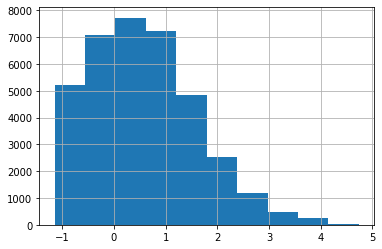

In [ ]:
sample_submission["Signal"].hist()

## Clip submission

In [ ]:
blend0 = pd.read_csv("Submissions/blend0.csv")

In [ ]:
blend0.tail()

,ID,Signal
36535,P01405_VINS_Central_Africa_41,0.354221
36536,P01405_VINS_Central_Africa_42,-0.011365
36537,P01405_VINS_Central_Africa_43,0.368122
36538,P01405_VINS_Central_Africa_44,0.636606
36539,P01405_VINS_Central_Africa_45,0.457322


In [ ]:
df = pd.read_csv("Data/Train.csv")

In [ ]:
blend0.Signal = blend0.Signal.clip(df.Signal.min(), df.Signal.max())

In [ ]:
blend0.to_csv("Submissions/blend0.csv", index=False)

## Blend 3

In [ ]:
def create_df_stack():
  df1 = pd.read_csv(f"Submissions/{os.listdir("Submissions/")[0]}")
  for i, f in enumerate(os.listdir("Submissions/")[1:]):
    df1 = pd.concat([df1, pd.read_csv(f"Submissions/{f}", usecols=[1], names=[f"Signal_{i}"], skiprows=1)], axis=1)

  return df1

In [ ]:
df = create_df_stack()

In [ ]:
model = Ridge(random_state=1123, alpha=3)

In [ ]:
model.fit(df[df.columns[2:]], df["Signal"])

Ridge(alpha=3, random_state=1123)

In [ ]:
pred=model.predict(df[df.columns[2:]])

In [ ]:
sample_submission=df[["ID"]]
sample_submission["Signal"] = pred.reshape((-1))
sample_submission.to_csv("Submissions/blend2.csv",index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sample_submission.head()

,ID,Signal
0,P19003_Bioclone_1,-0.751191
1,P19003_Bioclone_2,-0.647833
2,P19003_Bioclone_3,-0.671923
3,P19003_Bioclone_4,1.547557
4,P19003_Bioclone_5,0.637231


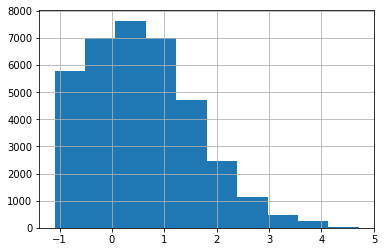

In [ ]:
sample_submission["Signal"].hist()

## Blend 4

In [ ]:
def create_df_stack2():
  train = pd.read_csv("Data/Train.csv")
  df1 = pd.read_csv(f"Submissions/{os.listdir('Submissions')[0]}")
  df1.Signal = df1.Signal.clip(train.Signal.min(), train.Signal.max())
  for i, f in enumerate(os.listdir("Submissions")[1:]):
    next = pd.read_csv(f"Submissions/{f}", usecols=[1], names=[f"Signal_{i}"], skiprows=1)
    next[f"Signal_{i}"] = next[f"Signal_{i}"].clip(train.Signal.min(), train.Signal.max())
    df1 = pd.concat([df1, next], axis=1)

  return df1

In [ ]:
df = create_df_stack2()

In [ ]:
model = Ridge(random_state=1123, alpha=3)

In [ ]:
model.fit(df[df.columns[2:]], df["Signal"])

Ridge(alpha=3, random_state=1123)

In [ ]:
pred=model.predict(df[df.columns[2:]])

In [ ]:
sample_submission=df[["ID"]]
sample_submission["Signal"] = pred.reshape((-1))
sample_submission.to_csv("Submissions/blend4_all_clipped.csv",index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sample_submission.head()

,ID,Signal
0,P19003_Bioclone_1,-0.750110
1,P19003_Bioclone_2,-0.646917
2,P19003_Bioclone_3,-0.670991
3,P19003_Bioclone_4,1.548727
4,P19003_Bioclone_5,0.638050


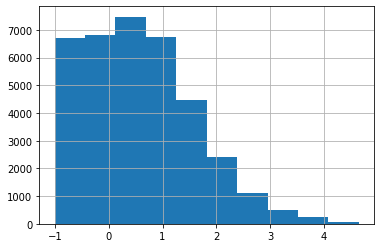

In [ ]:
sample_submission["Signal"].hist()

In [ ]:
sample_submission["Signal"].describe()

count    36540.000000
mean         0.581501
std          1.014123
min         -1.005131
25%         -0.239554
50%          0.489770
75%          1.226642
max          4.645167
Name: Signal, dtype: float64

## Average blends

In [ ]:
[f for f in os.listdir('Submissions') if "blend" in f]

['blend0.csv', 'blend1.csv', 'blend2.csv', 'blend4_all_clipped.csv']

In [ ]:
def create_df_stack3():
  train = pd.read_csv("Data/Train.csv")
  df1 = pd.read_csv(f"Submissions/{[f for f in os.listdir('Submissions') if 'blend' in f][0]}")
  df1.Signal = df1.Signal.clip(train.Signal.min(), train.Signal.max())
  for i, f in enumerate([f for f in os.listdir('Submissions') if "blend" in f][1:]):
    next = pd.read_csv(f"Submissions/{f}", usecols=[1], names=[f"Signal_{i}"], skiprows=1)
    next[f"Signal_{i}"] = next[f"Signal_{i}"].clip(train.Signal.min(), train.Signal.max())
    df1 = pd.concat([df1, next], axis=1)

  return df1

In [ ]:
df3 = create_df_stack3()

In [ ]:
df3

,ID,Signal,Signal_0,Signal_1,Signal_2
0,P19003_Bioclone_1,-0.789976,-0.790035,-0.751191,-0.750110
1,P19003_Bioclone_2,-0.679809,-0.679853,-0.647833,-0.646917
2,P19003_Bioclone_3,-0.700837,-0.700883,-0.671923,-0.670991
3,P19003_Bioclone_4,1.460138,1.460006,1.547557,1.548727
4,P19003_Bioclone_5,0.542692,0.542549,0.637231,0.638050
...,...,...,...,...,...
36535,P01405_VINS_Central_Africa_41,0.354221,0.354466,0.259984,0.260058
36536,P01405_VINS_Central_Africa_42,-0.011365,-0.011101,-0.088265,-0.088376
36537,P01405_VINS_Central_Africa_43,0.368122,0.368292,0.332752,0.333062
36538,P01405_VINS_Central_Africa_44,0.636606,0.636731,0.631057,0.631213


In [ ]:
sample_submission=df[["ID"]]
sample_submission["Signal"] = 0.4*df3.Signal_2+0.2*df3.Signal_1+0.2*df3.Signal_0+0.2*df3.Signal
sample_submission.to_csv("Submissions/blend5_blends_clipped_and_averaged.csv",index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sample_submission.head()

,ID,Signal
0,P19003_Bioclone_1,-0.766284
1,P19003_Bioclone_2,-0.660266
2,P19003_Bioclone_3,-0.683125
3,P19003_Bioclone_4,1.513031
4,P19003_Bioclone_5,0.599714


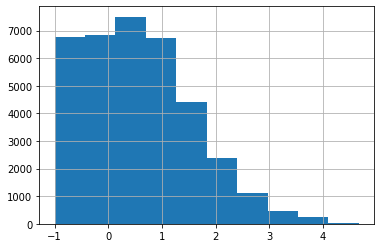

In [ ]:
sample_submission["Signal"].hist()

In [ ]:
sample_submission["Signal"].describe()

count    36540.000000
mean         0.581144
std          1.014111
min         -1.000000
25%         -0.238018
50%          0.490073
75%          1.224182
max          4.672067
Name: Signal, dtype: float64

## Blend 5

In [ ]:
[f for f in os.listdir('Submissions') if "blend" not in f]

['sample_submission.csv',
 'sample_submission_lb_ug.csv',
 'rf.csv',
 'cb.csv',
 'cb3-lessFeatures.csv',
 'sample_submission_lb_ug_more_features_bs_32.csv',
 'sample_submission_lb_ug_more_features.csv',
 'sample_submission_lb_ug_more_features-25epochs.csv',
 'sample_submission_lb_ug_more_features-15epochs1e3lr.csv',
 'cb2.csv',
 'sample_submission_lb_ug_more_features+stats.csv',
 'sample_submission_lb_ug_more_features2.csv',
 'sample_submission_lb_ug_more_features_3hdl.csv',
 'sample_submission_lb_ug_more_features_8hdl.csv',
 'sample_submission_lb_ug_more_features (1).csv']

In [ ]:
def create_df_stack3():
  train = pd.read_csv("Data/Train.csv")
  df1 = pd.read_csv(f"Submissions/{[f for f in os.listdir('Submissions') if 'blend' not in f][0]}")
  df1.Signal = df1.Signal.clip(train.Signal.min(), train.Signal.max())
  for i, f in enumerate([f for f in os.listdir('Submissions') if "blend" not in f][1:]):
    next = pd.read_csv(f"Submissions/{f}", usecols=[1], names=[f"Signal_{i}"], skiprows=1)
    next[f"Signal_{i}"] = next[f"Signal_{i}"].clip(train.Signal.min(), train.Signal.max())
    df1 = pd.concat([df1, next], axis=1)

  return df1

In [ ]:
df3 = create_df_stack3()

In [ ]:
df3

,ID,Signal,Signal_0,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10,Signal_11,Signal_12,Signal_13
0,P19003_Bioclone_1,-0.996608,-0.795908,-0.800165,-0.622076,-0.702664,-0.831535,-0.712062,-0.712062,-0.765221,-0.788217,-0.864637,-0.870431,-0.613768,-0.597887,-0.590366
1,P19003_Bioclone_2,-0.788735,-0.753853,-0.554088,-0.532648,-0.527374,-0.642671,-0.954730,-0.954730,-0.549223,-0.527149,-0.570135,-0.650052,-0.661995,-0.440367,-0.295520
2,P19003_Bioclone_3,-0.694263,-0.736840,-0.584062,-0.442964,-0.497492,-0.731263,-0.593987,-0.593987,-0.809398,-0.573859,-0.699077,-0.767863,-0.674234,-0.483589,-0.364754
3,P19003_Bioclone_4,0.892162,1.754054,0.064497,-0.075840,0.238933,0.844382,1.516414,1.516414,1.334674,0.140898,1.704229,1.425620,1.925396,1.432365,2.016859
4,P19003_Bioclone_5,0.250877,0.689860,-0.066947,-0.089376,0.102131,0.316749,0.726446,0.726446,0.055389,0.019893,0.621016,0.571922,0.832639,0.428382,1.520096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36535,P01405_VINS_Central_Africa_41,0.313477,-0.014012,0.783056,0.987740,0.600743,0.588072,0.729307,0.729307,0.202534,0.600351,0.921198,0.730427,-0.027813,0.046536,0.489745
36536,P01405_VINS_Central_Africa_42,-0.263989,-0.374149,1.083023,1.182723,0.793893,-0.048649,0.519925,0.519925,-0.029487,0.945880,0.407565,0.268161,-0.315104,-0.097542,0.055920
36537,P01405_VINS_Central_Africa_43,0.023290,0.120011,0.764054,0.969612,0.611605,0.035532,1.134035,1.134035,0.025870,0.663024,1.121452,0.966491,0.243759,0.399893,0.549042
36538,P01405_VINS_Central_Africa_44,0.442593,0.603991,1.019254,1.149169,0.853272,0.175664,1.272856,1.272856,0.388792,0.954372,0.949362,0.800085,0.539676,1.070886,0.657034


In [ ]:
sample_submission=df[["ID"]]
sample_submission["Signal"] = df3[df3.columns[1:]].apply(np.mean, axis=1)
sample_submission.to_csv("Submissions/blend6_avg.csv",index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sample_submission.head()

,ID,Signal
0,P19003_Bioclone_1,-0.750907
1,P19003_Bioclone_2,-0.626885
2,P19003_Bioclone_3,-0.616509
3,P19003_Bioclone_4,1.115404
4,P19003_Bioclone_5,0.447035


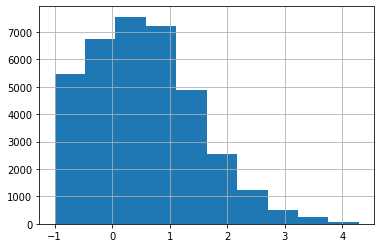

In [ ]:
sample_submission["Signal"].hist()

In [ ]:
sample_submission["Signal"].describe()

count    36540.000000
mean         0.557419
std          0.938075
min         -1.000000
25%         -0.186955
50%          0.483340
75%          1.147860
max          4.285693
Name: Signal, dtype: float64

#blend 7

In [ ]:
def create_df_stack2():
  train = pd.read_csv("Data/Train.csv")
  df1 = pd.read_csv(f"Submissions/{os.listdir('Submissions')[0]}")
  df1.Signal = df1.Signal.clip(train.Signal.min(), train.Signal.max())
  for i, f in enumerate(os.listdir("Submissions")[1:]):
    next = pd.read_csv(f"Submissions/{f}", usecols=[1], names=[f"Signal_{i}"], skiprows=1)
    next[f"Signal_{i}"] = next[f"Signal_{i}"].clip(train.Signal.min(), train.Signal.max())
    df1 = pd.concat([df1, next], axis=1)

  return df1

In [ ]:
df = create_df_stack2()

In [ ]:
model = Ridge(random_state=1123, alpha=3)

In [ ]:
model.fit(df[df.columns[2:]], df["Signal"])

Ridge(alpha=3, random_state=1123)

In [ ]:
pred=model.predict(df[df.columns[2:]])

In [ ]:
sample_submission=df[["ID"]]
sample_submission["Signal"] = pred.reshape((-1))
sample_submission.to_csv("Submissions/blend7_all_clipped.csv",index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sample_submission.head()

,ID,Signal
0,P19003_Bioclone_1,-0.939729
1,P19003_Bioclone_2,-0.757573
2,P19003_Bioclone_3,-0.691472
3,P19003_Bioclone_4,1.049657
4,P19003_Bioclone_5,0.342549


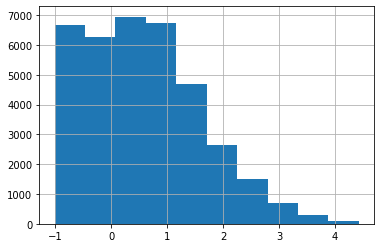

In [ ]:
sample_submission["Signal"].hist()